In [ ]:


    Statistical Analysis:
        Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
        Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

    Time Series Analysis:
        If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
        Explore how the mix of fuel types for power generation has evolved over the years.

    Advanced Visualization:
        Create visualizations using Matplotlib and Seaborn to illustrate your findings.
        Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.

    Matrix Operations in Real-World Context:
        Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
        Discuss the relevance of eigenvectors and eigenvalues in this context.

    Integrating NumPy with Pandas and Matplotlib:
        Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
        Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()

df = pd.read_csv("global_power_plant_database.csv")

# Take a quick look
df.head()


Saving global_power_plant_database.csv to global_power_plant_database.csv


/tmp/ipython-input-935982017.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("global_power_plant_database.csv")


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [5]:
#Data Import and Cleaning:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\nColumn names:")
print(df.columns.tolist())


filtered= ['country', 'primary_fuel', 'capacity_mw', 'commissioning_year', 'latitude', 'longitude']
df_filtered = df[filtered].copy()
print(df_filtered.head())


Number of rows: 34936
Number of columns: 36

Column names:
['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year', 'owner', 'source', 'url', 'geolocation_source', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017', 'estimated_generation_note_2013', 'estimated_generation_note_2014', 'estimated_generation_note_2015', 'estimated_generation_note_2016', 'estimated_generation_note_2017']
  country primary_fuel  capacity_mw  commissioning_year  latitude  longitude
0     AFG        Hydro         33.0                 NaN    32.322    65.1190
1     AFG

In [10]:
print(df_filtered.isnull().sum().sort_values(ascending=False)) #high almost half of commissioning year is empty.
print(df_filtered['commissioning_year'].describe())

print(df_filtered.dtypes)
#Identify missing values and handle them appropriately.
df_filtered = df_filtered.dropna(subset=['commissioning_year']) #drop almost half due to empty years

df_filtered['country'] = df_filtered['country'].astype('category')
df_filtered['primary_fuel'] = df_filtered['primary_fuel'].astype('category')
df_filtered['commissioning_year'] = df_filtered['commissioning_year'].astype('int32')
print(df_filtered.dtypes)
        #Use NumPy to convert relevant columns to numerical types if necessary.

country               0
primary_fuel          0
capacity_mw           0
commissioning_year    0
latitude              0
longitude             0
dtype: int64
count    17447.000000
mean      1997.414823
std         23.397835
min       1896.000000
25%       1988.000000
50%       2007.000000
75%       2014.000000
max       2020.000000
Name: commissioning_year, dtype: float64
country               category
primary_fuel          category
capacity_mw            float64
commissioning_year     float64
latitude               float64
longitude              float64
dtype: object
country               category
primary_fuel          category
capacity_mw            float64
commissioning_year       int32
latitude               float64
longitude              float64
dtype: object


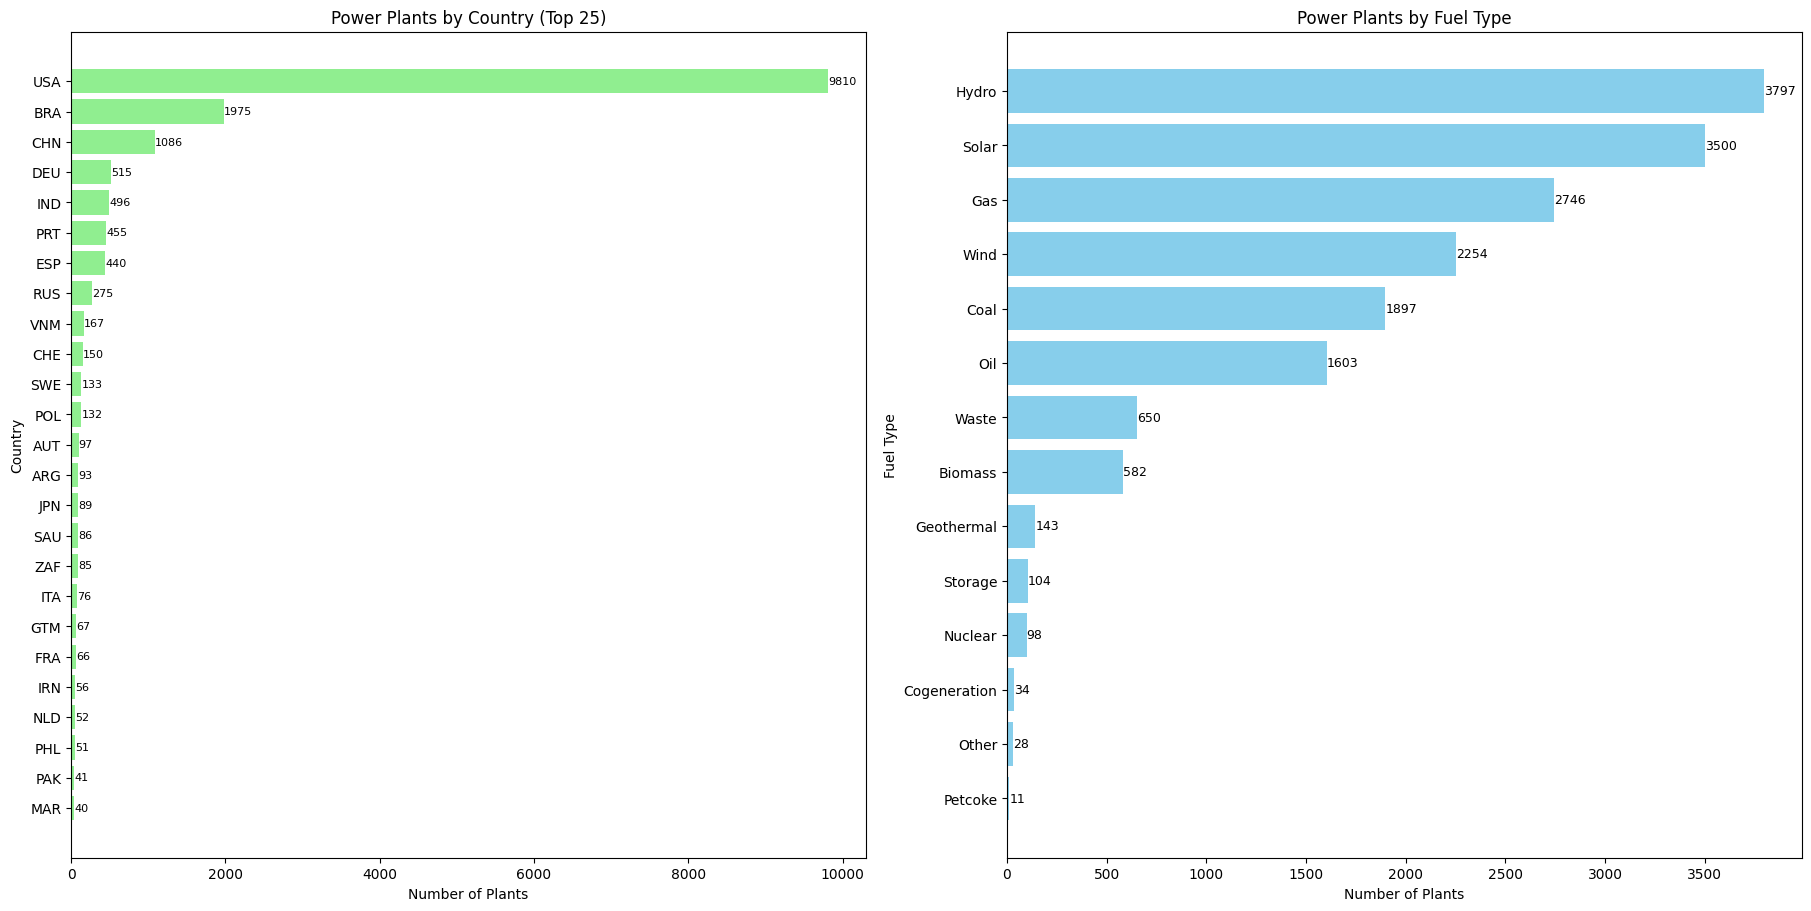

In [48]:
#Exploratory Data Analysis
#Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
df_filtered.describe()


# Prepare country counts
country_counts_sorted = df_filtered['country'].value_counts().sort_values(ascending=True)

# Prepare fuel counts
fuel_counts_sorted = (
    df_filtered['primary_fuel']
    .astype('string')
    .str.strip()
    .replace('', pd.NA)
    .dropna()
    .value_counts()
    .sort_values(ascending=True)
)

# Create 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(18, 9), constrained_layout=True)

# --- LEFT: Countries (top 25 for readability) ---
left = country_counts_sorted.tail(25)
axes[0].barh(left.index, left.values, color='lightgreen')
axes[0].set_title('Power Plants by Country (Top 25)')
axes[0].set_xlabel('Number of Plants')
axes[0].set_ylabel('Country')

# Add value labels to left chart
for i, v in enumerate(left.values):
    axes[0].text(v + 1, i, str(v), va='center', fontsize=8)

# --- RIGHT: Fuels ---
axes[1].barh(fuel_counts_sorted.index, fuel_counts_sorted.values, color='skyblue')
axes[1].set_title('Power Plants by Fuel Type')
axes[1].set_xlabel('Number of Plants')
axes[1].set_ylabel('Fuel Type')

# Add value labels to right chart
for i, v in enumerate(fuel_counts_sorted.values):
    axes[1].text(v + 1, i, str(v), va='center', fontsize=9)

plt.show()






In [57]:
#Statistical Analysis:
import numpy as np
from scipy import stats

df_power = df_filtered[['primary_fuel', 'capacity_mw']].dropna()
fuel_types = df_power['primary_fuel'].unique()
print(fuel_types)

for fuel in fuel_types:
    values = df_power[df_power['primary_fuel'] == fuel]['capacity_mw'].values
    print(f"{fuel}: count={len(values)}, mean={np.mean(values):.2f}, median={np.median(values):.2f}, std={np.std(values):.2f}")

#Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.

#Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

def ttest (fuel_name, df_filtered):
    sample = df_filtered[df_filtered['primary_fuel'] == fuel_name]['capacity_mw'].dropna().values

    # Skip if there's not enough data
    if len(sample) < 5:
        print(f"{fuel_name}: Not enough data to run t-test (n={len(sample)})")
        return

    # Population mean (overall)
    population_mean = df['capacity_mw'].mean()

    # One-sample t-test
    t_stat, p_val = stats.ttest_1samp(sample, population_mean)

    # Interpretation
    result = "✅ Significant difference" if p_val < 0.05 else "❌ Not significant"
    print(f"{fuel_name:15} | mean={np.mean(sample):8.2f} | p={p_val:.3e} | {result}")

for fuel in fuel_types:
    ttest(fuel, df_filtered)

['Hydro', 'Gas', 'Oil', 'Other', 'Nuclear', ..., 'Solar', 'Geothermal', 'Storage', 'Cogeneration', 'Petcoke']
Length: 14
Categories (14, object): ['Biomass', 'Coal', 'Cogeneration', 'Gas', ..., 'Solar', 'Storage', 'Waste',
                          'Wind']
Hydro: count=3797, mean=159.13, median=21.00, std=626.70
Gas: count=2746, mean=351.57, median=127.20, std=527.34
Oil: count=1603, mean=77.03, median=6.00, std=324.52
Other: count=28, mean=96.10, median=34.65, std=175.05
Nuclear: count=98, mean=1582.28, median=1403.00, std=814.12
Coal: count=1897, mean=907.93, median=655.10, std=885.04
Wind: count=2254, mean=63.92, median=30.00, std=80.28
Biomass: count=582, mean=35.59, median=17.85, std=48.22
Waste: count=650, mean=17.84, median=8.00, std=23.41
Solar: count=3500, mean=12.85, median=3.15, std=32.73
Geothermal: count=143, mean=52.00, median=27.50, std=101.16
Storage: count=104, mean=7.84, median=4.00, std=9.47
Cogeneration: count=34, mean=30.65, median=23.40, std=30.10
Petcoke: count=1

count    17447.000000
mean      1997.356852
std         23.436092
min       1896.000000
25%       1988.000000
50%       2007.000000
75%       2014.000000
max       2020.000000
Name: commissioning_year, dtype: float64
commissioning_year
1896    1
1899    1
1900    6
1901    2
1902    4
dtype: int64
commissioning_year
1896     2.00
1899     3.20
1900    88.94
1901     7.40
1902    23.50
Name: capacity_mw, dtype: float64
Earliest year: 1896
Latest year: 2020
Average plants built per year: 141.84552845528455
primary_fuel        Biomass  Coal  Cogeneration  Gas  Geothermal  Hydro  \
commissioning_year                                                        
1896                      0     0             0    0           0      1   
1899                      0     0             0    0           0      1   
1900                      0     0             0    1           0      3   
1901                      0     0             0    0           0      2   
1902                      0     0       

/tmp/ipython-input-866119600.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_time.groupby(['commissioning_year', 'primary_fuel'])
/tmp/ipython-input-866119600.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_time.groupby(['commissioning_year', 'country'])


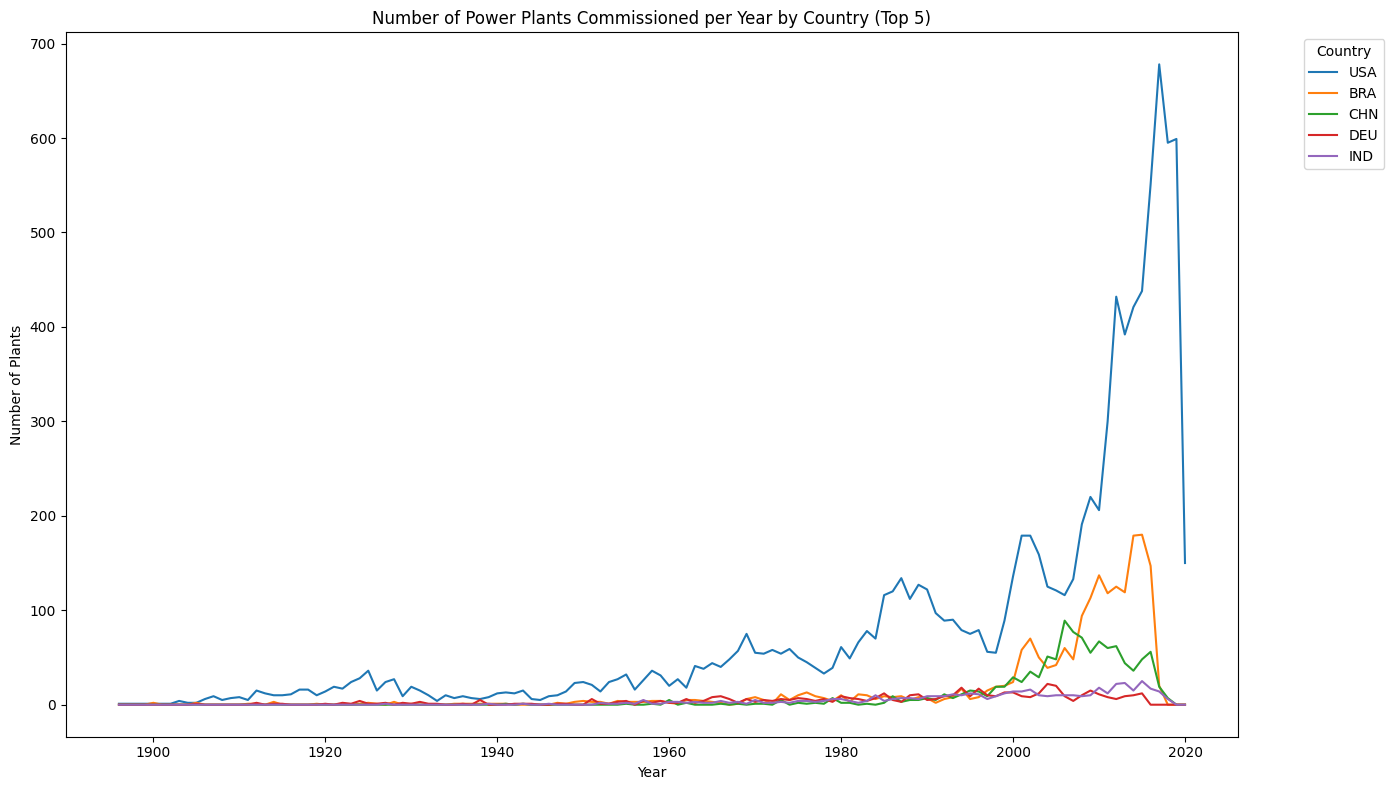

In [70]:
df_time = df_filtered[df_filtered['commissioning_year'].notna()]
df_time['commissioning_year'] = df_time['commissioning_year'].astype(int)
print(df_time['commissioning_year'].describe())


plants_per_year = df_time.groupby('commissioning_year').size()
print(plants_per_year.head())

capacity_per_year = df_time.groupby('commissioning_year')['capacity_mw'].sum()
print(capacity_per_year.head())


years = plants_per_year.index.to_numpy()
counts = plants_per_year.values

print("Earliest year:", years.min())
print("Latest year:", years.max())
print("Average plants built per year:", counts.mean())

plants_by_year_fuel = (
    df_time.groupby(['commissioning_year', 'primary_fuel'])
    .size()
    .unstack(fill_value=0)   # fuel types become columns
)

print(plants_by_year_fuel.head())

plants_by_year_country = (
    df_time.groupby(['commissioning_year', 'country'])
    .size()
    .unstack(fill_value=0)
)

print(plants_by_year_country.head())

# Find top N countries by total plant count
top_countries = plants_by_year_country.sum().sort_values(ascending=False).head(5).index

# Filter data to only these top countries
plants_top_countries = plants_by_year_country[top_countries]

print("Top countries:", list(top_countries))

plt.figure(figsize=(14, 8))

for country in plants_top_countries.columns:
    plt.plot(plants_top_countries.index, plants_top_countries[country], label=country)

plt.title('Number of Power Plants Commissioned per Year by Country (Top 5)')
plt.xlabel('Year')
plt.ylabel('Number of Plants')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


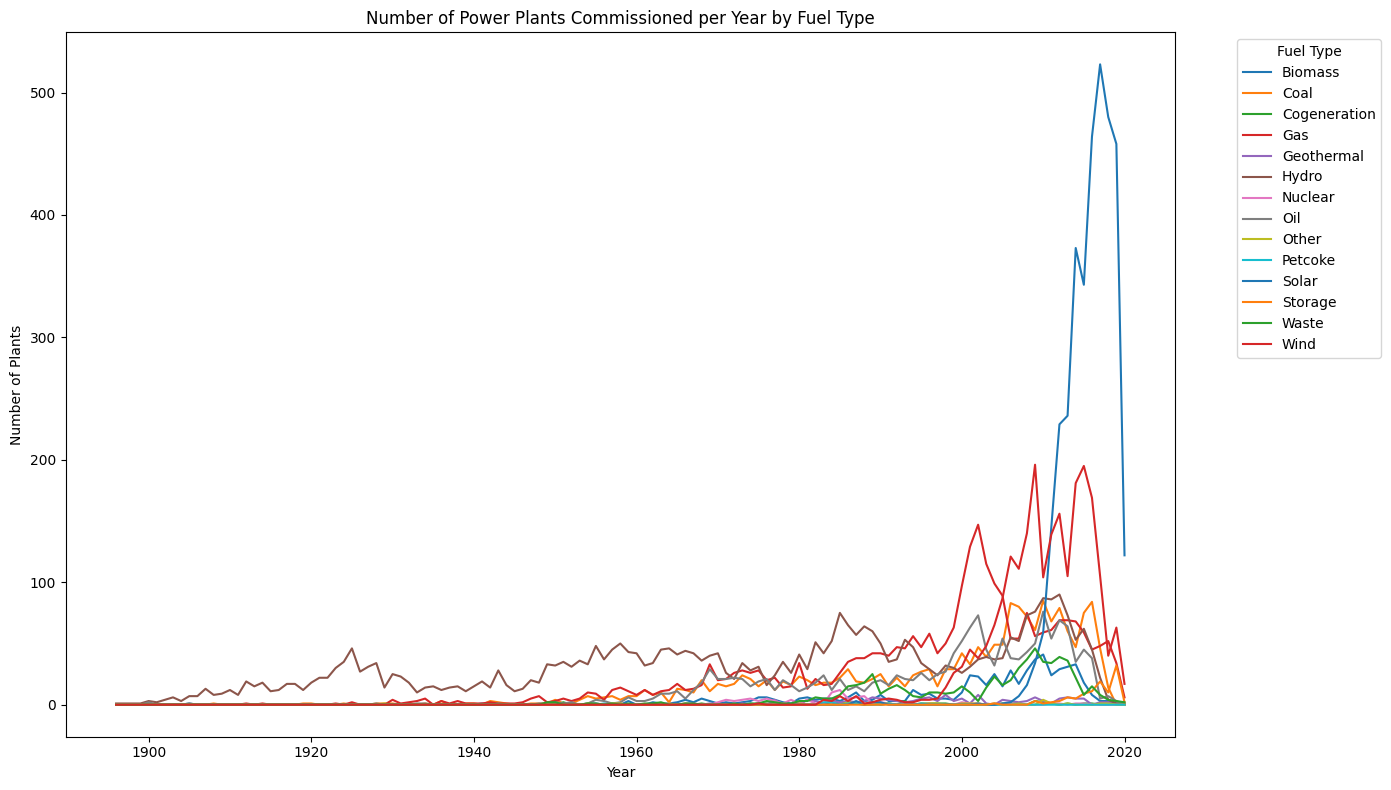

In [68]:
#Advance Visualization

plt.figure(figsize=(14, 8))

for fuel in plants_by_year_fuel.columns:
    plt.plot(plants_by_year_fuel.index, plants_by_year_fuel[fuel], label=fuel)

plt.title('Number of Power Plants Commissioned per Year by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Number of Plants')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [76]:
#Matrix Operations in Real World Context

import numpy as np

fuel_country_matrix = pd.crosstab(df_filtered['primary_fuel'], df_filtered['country'])
print(fuel_country_matrix.head())

matrix = fuel_country_matrix.to_numpy()
print(matrix)

print(matrix.shape)


##I created a matrix with the # of power plants by fuel type (rows) and country (columns) using the Panda module crosstab. This matrix lets us see which countries use  which fuel types.

#eigenvectors and values: we use it to identify patterns and dominant relationships in the matrix.

eigvals, eigvecs = np.linalg.eig(fuel_country_matrix.to_numpy())

#result didn't work because it's not a square matrix

country       ALB  ARE  ARG  ARM  ATA  AUT  AZE  BEL  BGD  BGR  ...  TWN  TZA  \
primary_fuel                                                    ...             
Biomass         0    0    0    0    0    0    0    1    0    0  ...    0    0   
Coal            0    0    8    0    0    0    0    1    0    9  ...    4    0   
Cogeneration    0    0    0    0    0    0    0    0    0    0  ...    0    0   
Gas             0   24   31    1    0    3    8    8   11    0  ...    5    1   
Geothermal      0    0    0    0    0    0    0    0    0    0  ...    0    0   

country       UKR   USA  UZB  VEN  VNM  YEM  ZAF  ZMB  
primary_fuel                                           
Biomass         0   153    0    0    0    0    1    0  
Coal           19   285    2    0    2    0   17    1  
Cogeneration    0    34    0    0    0    0    0    0  
Gas             0  1809    5    6    0    1    2    0  
Geothermal      0    65    0    0    0    0    0    0  

[5 rows x 95 columns]
[[ 0  0  0 ...  0

LinAlgError: Last 2 dimensions of the array must be square

      country primary_fuel  capacity_mw  commissioning_year  latitude  \
24752     USA         Coal        706.8                1985   37.9053   
24780     USA         Coal        203.0                1992   21.3034   
24785     USA         Coal       2154.8                1976   38.5281   
24787     USA         Coal        229.0                1999   39.5952   
24934     USA         Coal        598.4                1958   45.0300   

       longitude  
24752   -87.7150  
24780  -158.1065  
24785   -87.2525  
24787   -78.7453  
24934   -92.7786  


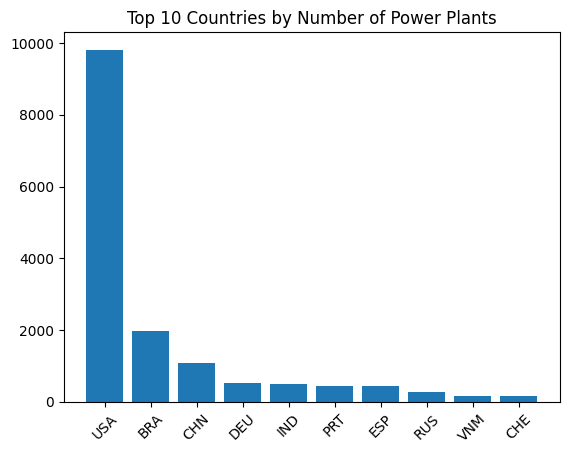

In [79]:
#Integrating NumPy with Pandas and Matplotlib:
##Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.


country_filter = df_filtered['country'].to_numpy() == 'USA'
fuel_filter = df_filtered['primary_fuel'].to_numpy() == 'Coal'

combined = np.logical_and(country_filter, fuel_filter)
usa_coal_plants = df_filtered[combined]

print(usa_coal_plants.head())
##Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

country_counts = df_filtered['country'].value_counts()

plt.bar(country_counts.index[:10], country_counts.values[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Number of Power Plants')
plt.show()
